In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.callbacks import TensorBoard
import time
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
mnist = tf.keras.datasets.mnist                       #28*28 image of handwritten of 0-9 
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print("testing data shape is:{} ".format(x_test.shape))
print("testing data labels is:{}".format(y_test.shape))

(60000, 28, 28)
(60000,)
testing data shape is:(10000, 28, 28) 
testing data labels is:(10000,)


In [ ]:
print("train training data is :{}".format(x_train[0]))

train training data is :[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

In [ ]:
print("training labels are:{}".format(y_train[0:5]))

training labels are:[5 0 4 1 9]


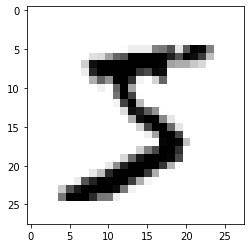

In [ ]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis = 2)
x_test = tf.keras.utils.normalize(x_test,axis = 2)

In [ ]:
print("Training Data after normalizing is {}".format(x_train[0]))
print("Testing  Data after normalizing is {}".format(x_test[0]))

Training Data after normalizing is [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.       

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # softmax for probability distribution
model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'] )
model.fit(x_train,y_train,epochs = 3 )
predictions = model.predict([x_test])

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4614 - accuracy: 0.8637
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1096 - accuracy: 0.9669
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0712 - accuracy: 0.9779
Consider rewriting this model with the Functional API.


In [ ]:
# another way of doing abbove code
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
print("Probability distribution for a multi-class classification")
predictions[0]

Probability distribution for a multi-class classification


array([9.7308668e-09, 2.1006941e-09, 8.9022006e-07, 1.9155468e-06,
       2.5243777e-10, 5.4490478e-08, 1.6261682e-14, 9.9999702e-01,
       1.0209773e-08, 1.3217587e-07], dtype=float32)

In [ ]:
print(np.argmax(predictions[0]))

7


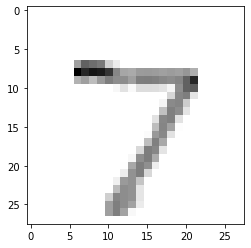

In [ ]:
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.0870 - acc: 0.9733
0.08702370782028884 0.9733


In [ ]:
predictions = model.predict([x_test])

In [ ]:
print(np.argmax(predictions[0]))

7


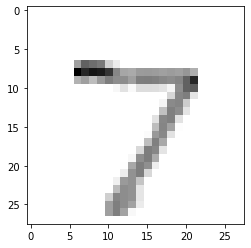

In [ ]:
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()